In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from lxml import etree
from matplotlib.patches import Rectangle
import numpy as np
import glob

In [2]:
tf.__version__

'2.4.0'

In [3]:
tf.test.is_gpu_available()

True

In [4]:
img = tf.io.read_file(r'../input/the-oxfordiiit-pet-dataset/images/images/beagle_109.jpg')

In [5]:
img = tf.image.decode_jpeg(img)

In [6]:
img.shape

TensorShape([329, 500, 3])

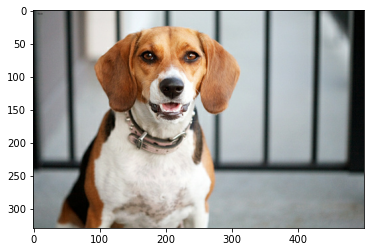

In [7]:
plt.imshow(img.numpy())
plt.show()

In [8]:
xml = open(r'../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/beagle_109.xml').read()

In [9]:
sel = etree.HTML(xml)

In [10]:
width = sel.xpath('//size/width/text()')[0]
width

'500'

In [11]:
height = sel.xpath('//size/height/text()')[0]
height

'329'

In [12]:
xmin = sel.xpath('//bndbox/xmin/text()')[0]
xmin

'93'

In [13]:
ymin = sel.xpath('//bndbox/ymin/text()')[0]
xmax = sel.xpath('//bndbox/xmax/text()')[0]
ymax = sel.xpath('//bndbox/ymax/text()')[0]

In [14]:
ymin, xmax, ymax

('24', '312', '171')

In [15]:
width = int(width)
height = int(height)

In [16]:
xmin = int(xmin)
ymin = int(ymin)
xmax = int(xmax)
ymax = int(ymax)

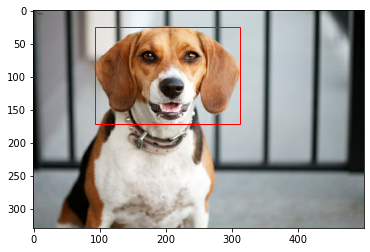

In [17]:
plt.imshow(img.numpy())
rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)
plt.show()

In [18]:
img = tf.image.resize(img, [224, 224])

In [19]:
img = img/255

In [20]:
xmin = (xmin/width)*224
ymin = (ymin/height)*224
xmax = (xmax/width)*224
ymax = (ymax/height)*224

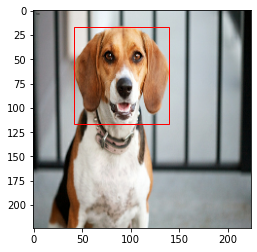

In [21]:
plt.imshow(img.numpy())
rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)
plt.show()

# 创建输入管道

In [22]:
images = glob.glob('../input/the-oxfordiiit-pet-dataset/images/images/*.jpg')

In [23]:
images[:5]

['../input/the-oxfordiiit-pet-dataset/images/images/american_pit_bull_terrier_16.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/leonberger_200.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/english_cocker_spaniel_35.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/Siamese_67.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/boxer_77.jpg']

In [24]:
len(images)

7390

In [25]:
xmls = glob.glob('../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/*.xml')

In [26]:
xmls[:5]

['../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/staffordshire_bull_terrier_165.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/saint_bernard_182.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/Birman_151.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/British_Shorthair_180.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/Birman_153.xml']

In [27]:
len(xmls)

3686

In [28]:
xmls[0].split('/')[-1].split('.xml')[0]

'staffordshire_bull_terrier_165'

In [29]:
names = [x.split('/')[-1].split('.xml')[0] for x in xmls]

In [30]:
len(names)

3686

In [31]:
imgs_train = [img for img in images if (img.split('/')[-1].split('.jpg')[0]) in names]

In [32]:
imgs_train[:3]

['../input/the-oxfordiiit-pet-dataset/images/images/american_pit_bull_terrier_16.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/saint_bernard_146.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/Egyptian_Mau_164.jpg']

In [33]:
len(imgs_train)

3686

In [34]:
imgs_test = [img for img in images if (img.split('/')[-1].split('.jpg')[0]) not in names]

In [35]:
len(imgs_test)

3704

In [36]:
imgs_train.sort(key=lambda x: x.split('/')[-1].split('.jpg')[0])

In [37]:
imgs_train[:3]

['../input/the-oxfordiiit-pet-dataset/images/images/Abyssinian_1.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/Abyssinian_10.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/Abyssinian_100.jpg']

In [38]:
imgs_train[-3:]

['../input/the-oxfordiiit-pet-dataset/images/images/yorkshire_terrier_188.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/yorkshire_terrier_189.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/yorkshire_terrier_190.jpg']

In [39]:
xmls.sort(key=lambda x: x.split('/')[-1].split('.xml')[0])

In [40]:
xmls[:3]

['../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/Abyssinian_1.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/Abyssinian_10.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/Abyssinian_100.xml']

In [41]:
xmls[-3:]

['../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/yorkshire_terrier_188.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/yorkshire_terrier_189.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/yorkshire_terrier_190.xml']

In [42]:
def to_labels(path):
    xml = open(r'{}'.format(path)).read()
    sel = etree.HTML(xml)
    width = int(sel.xpath('//size/width/text()')[0])
    height = int(sel.xpath('//size/height/text()')[0])
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [43]:
labels = [to_labels(path) for path in xmls]

In [44]:
out1_label, out2_label, out3_label, out4_label = list(zip(*labels))  
#星花拆解

In [45]:
len(out1_label), len(out2_label), len(out3_label), len(out4_label)

(3686, 3686, 3686, 3686)

In [46]:
out1_label = np.array(out1_label)
out2_label = np.array(out2_label)
out3_label = np.array(out3_label)
out4_label = np.array(out4_label)

In [47]:
label_datset = tf.data.Dataset.from_tensor_slices((
                                              out1_label, 
                                              out2_label, 
                                              out3_label, 
                                              out4_label))

In [48]:
label_datset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.float64, tf.float64, tf.float64, tf.float64)>

In [49]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = tf.cast(img,tf.float32)
    img = img/127.5 - 1
    return img

In [50]:
image_dataset = tf.data.Dataset.from_tensor_slices(imgs_train)

In [51]:
image_dataset = image_dataset.map(load_image)

In [52]:
test_dataset = tf.data.Dataset.from_tensor_slices(imgs_test).map(load_image)

In [53]:
image_dataset

<MapDataset shapes: (224, 224, 3), types: tf.float32>

In [54]:
test_dataset

<MapDataset shapes: (224, 224, 3), types: tf.float32>

In [55]:
dataset = tf.data.Dataset.zip((image_dataset, label_datset))

In [56]:
dataset

<ZipDataset shapes: ((224, 224, 3), ((), (), (), ())), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [57]:
dataset = dataset.repeat().shuffle(len(imgs_train)).batch(32)

In [58]:
test_dataset = test_dataset.batch(32)

In [59]:
dataset

<BatchDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

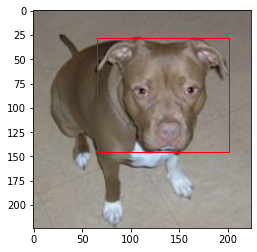

In [60]:
for img, label in dataset.take(1):
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    out1, out2, out3, out4 = label
    xmin, ymin, xmax, ymax = out1[0].numpy()*224, out2[0].numpy()*224, out3[0].numpy()*224, out4[0].numpy()*224
    rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
    ax = plt.gca()
    ax.axes.add_patch(rect)
    plt.show()

# 创建定位模型

In [61]:
xception = tf.keras.applications.Xception(weights='imagenet', 
                                          include_top=False,
                                          input_shape=(224, 224, 3))

83689472/83683744 [==============================] - 1s 0us/step


In [62]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))

x = xception(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)

out1 = tf.keras.layers.Dense(1)(x)
out2 = tf.keras.layers.Dense(1)(x)
out3 = tf.keras.layers.Dense(1)(x)
out4 = tf.keras.layers.Dense(1)(x)

predictions = [out1, out2, out3, out4]

model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='mse')

In [64]:
EPOCHS = 50

In [65]:
history = model.fit(dataset,epochs=EPOCHS,steps_per_epoch=len(imgs_train)//32)

Epoch 1/50
115/115 [==============================] - 77s 496ms/step - loss: 0.1693 - dense_2_loss: 0.0296 - dense_3_loss: 0.0260 - dense_4_loss: 0.0763 - dense_5_loss: 0.0375
Epoch 2/50
115/115 [==============================] - 57s 493ms/step - loss: 0.0340 - dense_2_loss: 0.0078 - dense_3_loss: 0.0062 - dense_4_loss: 0.0096 - dense_5_loss: 0.0104
Epoch 3/50
115/115 [==============================] - 56s 491ms/step - loss: 0.0228 - dense_2_loss: 0.0050 - dense_3_loss: 0.0037 - dense_4_loss: 0.0065 - dense_5_loss: 0.0076
Epoch 4/50
115/115 [==============================] - 56s 491ms/step - loss: 0.0120 - dense_2_loss: 0.0027 - dense_3_loss: 0.0021 - dense_4_loss: 0.0038 - dense_5_loss: 0.0035
Epoch 5/50
115/115 [==============================] - 57s 492ms/step - loss: 0.0111 - dense_2_loss: 0.0026 - dense_3_loss: 0.0022 - dense_4_loss: 0.0030 - dense_5_loss: 0.0033
Epoch 6/50
115/115 [==============================] - 56s 489ms/step - loss: 0.0093 - dense_2_loss: 0.0021 - dense_3_los

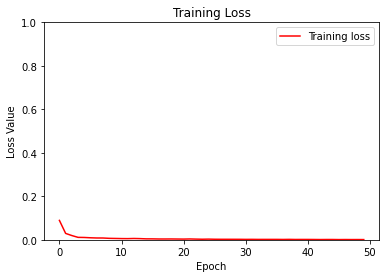

In [66]:
loss = history.history['loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

# 模型保存

In [67]:
model.save('detect_v1.h5')

In [68]:
new_model = tf.keras.models.load_model('detect_v1.h5')

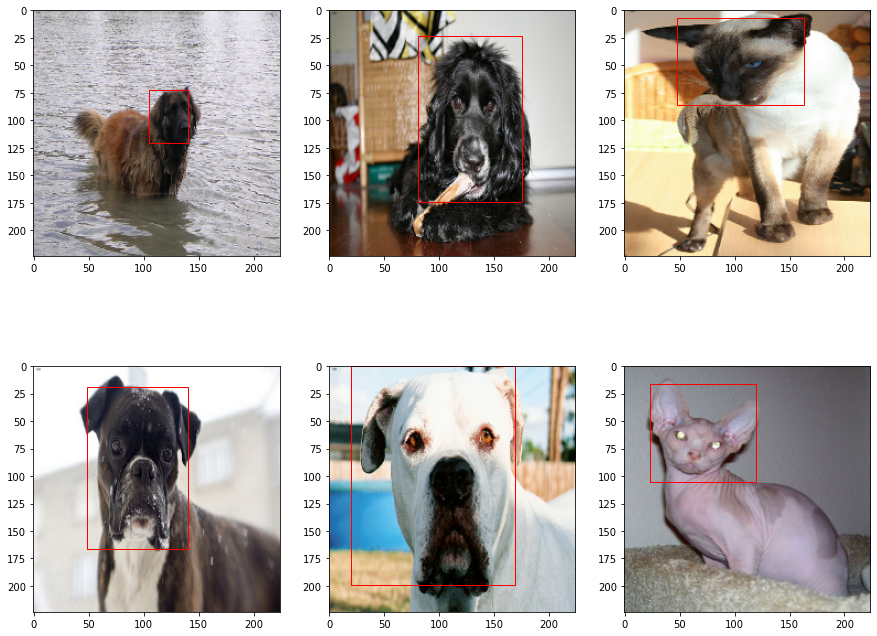

In [69]:
plt.figure(figsize=(15, 12))
for img in test_dataset.take(1):
    out1, out2, out3, out4 = new_model.predict(img)
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(img[i]))
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224,
        rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
        ax = plt.gca()
        ax.axes.add_patch(rect)